In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cargamos los datos. Importamos el archivo que se encuentra en el drive

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Granjaelsol/Planilla_Control_Negocio.xlsx", sheet_name="Ventas")
df.head()

,Fecha,Producto vendido,Cantidad (kg/unidades),Precio unitario ($),Total venta ($),Categoria,Total,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2025-09-24,Asado,10.680,13750.0,146850.00,Carne,NaN,NaN,NaN,NaN
1,2025-09-24,Vacio,6.420,15900.0,102078.00,Carne,NaN,NaN,NaN,NaN
2,2025-09-24,Cuadrada,1.155,12750.0,14726.25,Carne,NaN,NaN,NaN,NaN
3,2025-09-24,Tapa de nalga,1.490,12200.0,18178.00,Carne,NaN,NaN,NaN,NaN
4,2025-09-24,Tapa de Asado,2.745,11900.0,32665.50,Carne,NaN,NaN,NaN,NaN


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fecha                   798 non-null    datetime64[ns]
 1   Producto vendido        798 non-null    object        
 2   Cantidad (kg/unidades)  798 non-null    float64       
 3   Precio unitario ($)     729 non-null    float64       
 4   Total venta ($)         798 non-null    float64       
 5   Categoria               798 non-null    object        
 6   Total                   31 non-null     float64       
 7   Unnamed: 7              0 non-null      float64       
 8   Unnamed: 8              0 non-null      float64       
 9   Unnamed: 9              1 non-null      object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 62.5+ KB


,0
Fecha,0
Producto vendido,0
Cantidad (kg/unidades),0
Precio unitario ($),69
Total venta ($),0
Categoria,0
Total,767
Unnamed: 7,798
Unnamed: 8,798
Unnamed: 9,797


In [ ]:
df = df.drop(columns=['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Total'])


Podemos ver que las columnas 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Total' son redudantes y no aportan valor al analisis de transacciones, por lo tanto las eliminamos


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fecha                   798 non-null    datetime64[ns]
 1   Producto vendido        798 non-null    object        
 2   Cantidad (kg/unidades)  798 non-null    float64       
 3   Precio unitario ($)     729 non-null    float64       
 4   Total venta ($)         798 non-null    float64       
 5   Categoria               798 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 37.5+ KB


,0
Fecha,0
Producto vendido,0
Cantidad (kg/unidades),0
Precio unitario ($),69
Total venta ($),0
Categoria,0


In [ ]:
(df['Cantidad (kg/unidades)'] * df['Precio unitario ($)']).round(2) == df['Total venta ($)']


,0
0,True
1,True
2,True
3,True
4,True
...,...
793,True
794,True
795,True
796,False


En esta seccion verificamos la consistencia aritmetica entre las columnas 'Cantidad (kg/unidades)', 'Precio unitario ($)' y 'Total venta ($)'. Si la multiplicacion de Cantidad x Precio Unitario  es igual al Total venta ($) registrado, se considera que el registro es coherente. En caso contrario, indica posibles errores o valores faltantes que deben revisarse o imputarse.

In [ ]:
inconsistentes = df[(df['Cantidad (kg/unidades)'] * df['Precio unitario ($)']).round(2) != df['Total venta ($)']]
inconsistentes


,Fecha,Producto vendido,Cantidad (kg/unidades),Precio unitario ($),Total venta ($),Categoria
33,2025-09-24,Gen Unitario,10.000,NaN,35385.00,Almacen
34,2025-09-24,Gen Pesable,19.720,NaN,181180.50,Otros
50,2025-09-25,Gen Unitario,3.000,NaN,24950.00,Almacen
51,2025-09-25,Gen Pesable,6.395,NaN,60566.25,Otros
73,2025-09-26,Gen Unitario,6.000,NaN,47000.00,Almacen
...,...,...,...,...,...,...
722,2025-10-24,Gen pesable,4.510,NaN,49805.50,Otros
758,2025-10-25,Gen unitario,3.000,NaN,23000.00,Almacen
759,2025-10-25,Gen pesable,3.720,NaN,25931.25,Otros
796,2025-10-26,Gen unitario,7.000,NaN,37500.00,Almacen


Realizamos y detectamos registros inconsistentes, es decir filas en donde el valor de venta no coincide con el calculo esperado segun la cantidad y el precio unitario. La variables inconsistentes contiene todas las filas que representan errores o valores faltantes que rompen la coherencia entre : Cantidad × Precio unitario ≠ Total venta

In [ ]:
df.loc[df['Precio unitario ($)'].isna(), 'Precio unitario ($)'] = (
    df['Total venta ($)'] / df['Cantidad (kg/unidades)']
).round(2)


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fecha                   798 non-null    datetime64[ns]
 1   Producto vendido        798 non-null    object        
 2   Cantidad (kg/unidades)  798 non-null    float64       
 3   Precio unitario ($)     798 non-null    float64       
 4   Total venta ($)         798 non-null    float64       
 5   Categoria               798 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 37.5+ KB


,0
Fecha,0
Producto vendido,0
Cantidad (kg/unidades),0
Precio unitario ($),0
Total venta ($),0
Categoria,0


In [ ]:
df['Categoria'].value_counts()
df['Categoria'] = df['Categoria'].str.strip().str.capitalize()


In [ ]:
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Día'] = df['Fecha'].dt.day

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fecha                   798 non-null    datetime64[ns]
 1   Producto vendido        798 non-null    object        
 2   Cantidad (kg/unidades)  798 non-null    float64       
 3   Precio unitario ($)     798 non-null    float64       
 4   Total venta ($)         798 non-null    float64       
 5   Categoria               798 non-null    object        
 6   Año                     798 non-null    int32         
 7   Mes                     798 non-null    int32         
 8   Día                     798 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(3), object(2)
memory usage: 46.9+ KB


,Fecha,Producto vendido,Cantidad (kg/unidades),Precio unitario ($),Total venta ($),Categoria,Año,Mes,Día
0,2025-09-24,Asado,10.680,13750.0,146850.00,Carne,2025,9,24
1,2025-09-24,Vacio,6.420,15900.0,102078.00,Carne,2025,9,24
2,2025-09-24,Cuadrada,1.155,12750.0,14726.25,Carne,2025,9,24
3,2025-09-24,Tapa de nalga,1.490,12200.0,18178.00,Carne,2025,9,24
4,2025-09-24,Tapa de Asado,2.745,11900.0,32665.50,Carne,2025,9,24


BLOQUE 1


<Axes: title={'center': 'Evolución diaria de ventas'}, xlabel='Fecha'>

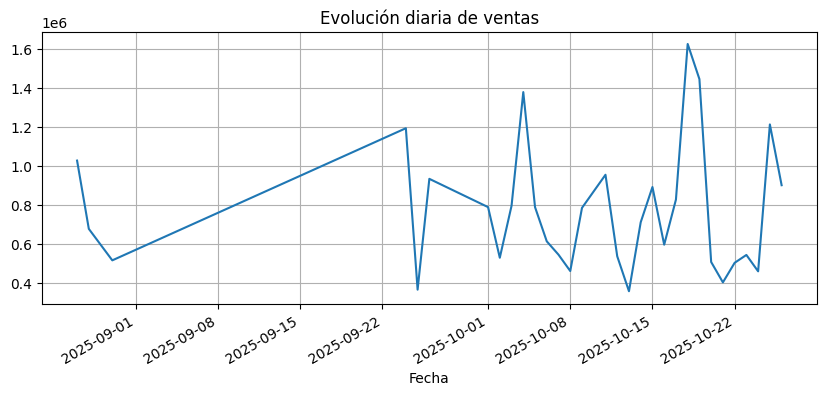

In [ ]:
# Resumen estadístico general
df.describe(include='all')

# Total de ventas general
df['Total venta ($)'].sum()

# Promedio y mediana del precio unitario
df['Precio unitario ($)'].agg(['mean', 'median'])

# Ventas promedio por día
df.groupby('Fecha')['Total venta ($)'].sum().plot(figsize=(10,4), title='Evolución diaria de ventas', grid=True)


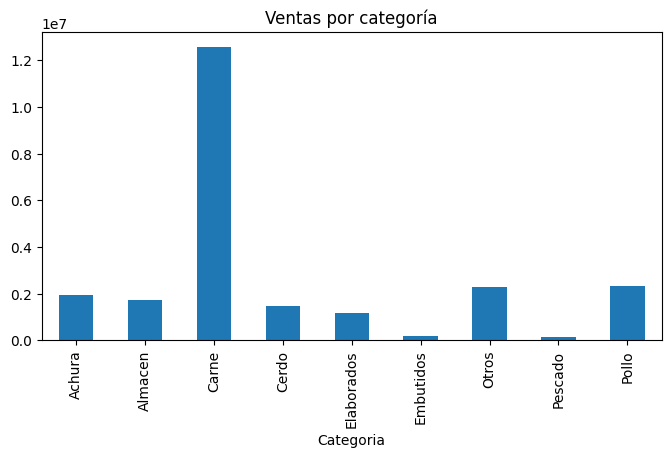

In [ ]:
# Ventas totales por categoría
df.groupby('Categoria')['Total venta ($)'].sum().sort_values(ascending=False)

# Top 10 productos más vendidos
df.groupby('Producto vendido')['Total venta ($)'].sum().sort_values(ascending=False).head(10)

# Visualización
import matplotlib.pyplot as plt

df.groupby('Categoria')['Total venta ($)'].sum().plot(kind='bar', figsize=(8,4), title='Ventas por categoría')
plt.show()


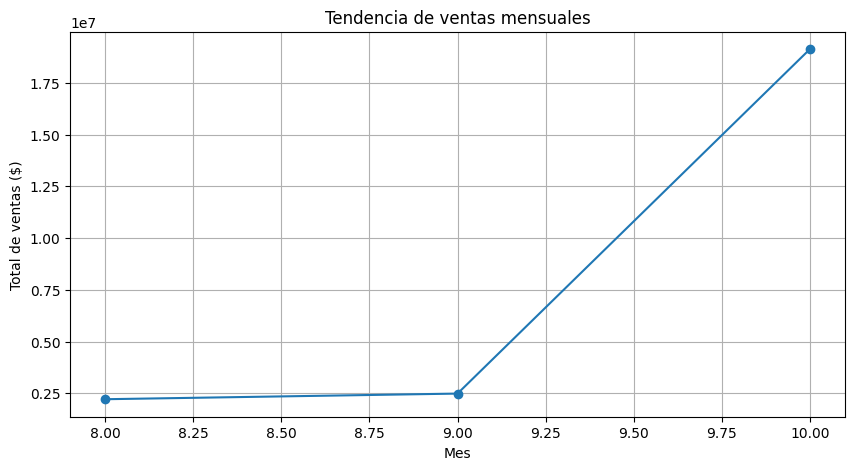

In [ ]:
# Ventas mensuales
ventas_mensuales = df.groupby(['Año', 'Mes'])['Total venta ($)'].sum().reset_index()

# Visualización
plt.figure(figsize=(10,5))
plt.plot(ventas_mensuales['Mes'], ventas_mensuales['Total venta ($)'], marker='o')
plt.title('Tendencia de ventas mensuales')
plt.xlabel('Mes')
plt.ylabel('Total de ventas ($)')
plt.grid(True)
plt.show()
